In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns     
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv("/Users/stone/programing/2Week_project/부동산예측/house-prices-advanced-regression-techniques/train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 1. 결측치 100개 이상인 것 다 삭제.

In [5]:
threshold = 100  # 결측치 임계값

# 결측치 수가 threshold 이상인 열 추출
cols_to_drop = df.columns[df.isna().sum() >= threshold]

# 추출된 열 삭제
df = df.drop(cols_to_drop, axis=1)
print(df.columns)
print(len(df.columns))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

## 2. one_hot encoding

In [6]:
# column들 전부 가져오기
columns = df.columns
lst = columns.tolist()
print(len(lst))

75


In [7]:
object_cols = list(df.select_dtypes(include='object').columns)
print(len(object_cols))

38


In [8]:
# one_hot incoding

for i in object_cols:
    value = list(df[i].unique())
    dic = {}
    for j in range(len(value)):
        dic[value[j]] = j
    df[i] = df[i].replace(dic)
    

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [10]:
columns = df.columns
lst = columns.tolist()

## 3. 추가 열 삭제.

In [11]:
#id
df = df.drop('Id', axis=1)

In [12]:
columns = df.columns
lst = columns.tolist()

In [13]:
# 한 열에서 표준편차가 1 이하이면 모두 삭제
# 고루 분포되어 있지 않다고 판단
# 편향된 데이터이기에
for i in columns:
    st = df[i].describe()['std']
    if st < 1:
        df = df.drop(i, axis=1)
    

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotArea        1460 non-null   int64  
 2   LotConfig      1460 non-null   int64  
 3   Neighborhood   1460 non-null   int64  
 4   Condition1     1460 non-null   int64  
 5   BldgType       1460 non-null   int64  
 6   HouseStyle     1460 non-null   int64  
 7   OverallQual    1460 non-null   int64  
 8   OverallCond    1460 non-null   int64  
 9   YearBuilt      1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  Exterior1st    1460 non-null   int64  
 12  Exterior2nd    1460 non-null   int64  
 13  MasVnrArea     1452 non-null   float64
 14  BsmtExposure   1460 non-null   float64
 15  BsmtFinType1   1460 non-null   int64  
 16  BsmtFinSF1     1460 non-null   int64  
 17  BsmtFinType2   1460 non-null   int64  
 18  BsmtFinS

## 4. knn으로 결측치 채워주기.

In [15]:
imputer = KNNImputer(n_neighbors = 3)
df_f = imputer.fit_transform(df)
df_f = pd.DataFrame(df_f,columns = df.columns)
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   LotConfig      1460 non-null   float64
 3   Neighborhood   1460 non-null   float64
 4   Condition1     1460 non-null   float64
 5   BldgType       1460 non-null   float64
 6   HouseStyle     1460 non-null   float64
 7   OverallQual    1460 non-null   float64
 8   OverallCond    1460 non-null   float64
 9   YearBuilt      1460 non-null   float64
 10  YearRemodAdd   1460 non-null   float64
 11  Exterior1st    1460 non-null   float64
 12  Exterior2nd    1460 non-null   float64
 13  MasVnrArea     1460 non-null   float64
 14  BsmtExposure   1460 non-null   float64
 15  BsmtFinType1   1460 non-null   float64
 16  BsmtFinSF1     1460 non-null   float64
 17  BsmtFinType2   1460 non-null   float64
 18  BsmtFinS

## 5. 데이터셋 나누기

In [16]:
train_dataset, val_dataset = train_test_split(df_f, test_size=0.2,random_state = 2)

print('학습 데이터셋 크기:', len(train_dataset))
print('검증 데이터셋 크기:', len(val_dataset))

학습 데이터셋 크기: 1168
검증 데이터셋 크기: 292


In [17]:
train_dataset.describe()

,MSSubClass,LotArea,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.703767,10469.416952,0.601884,9.535103,0.381849,0.443493,1.138699,6.077055,5.580479,1970.804795,...,94.044521,47.829623,21.232877,3.930651,15.089897,2.378425,48.530822,6.391267,2007.805651,179980.860445
std,42.115843,9900.244101,1.010602,5.910976,1.213921,1.074065,1.332325,1.377710,1.109450,30.408663,...,126.689946,68.592179,59.570072,31.876171,56.526291,36.477960,543.686751,2.716258,1.315286,78922.944358
min,20.000000,1477.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7500.000000,0.000000,5.000000,0.000000,0.000000,0.000000,5.000000,5.000000,1953.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,50.000000,9434.500000,0.000000,10.000000,0.000000,0.000000,1.000000,6.000000,5.000000,1972.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161250.000000
75%,70.000000,11506.500000,1.250000,14.000000,0.000000,0.000000,1.000000,7.000000,6.000000,2000.000000,...,168.000000,68.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213310.000000
max,190.000000,215245.000000,4.000000,24.000000,8.000000,4.000000,7.000000,10.000000,9.000000,2010.000000,...,857.000000,547.000000,386.000000,508.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


## 6. pearson 상관계수

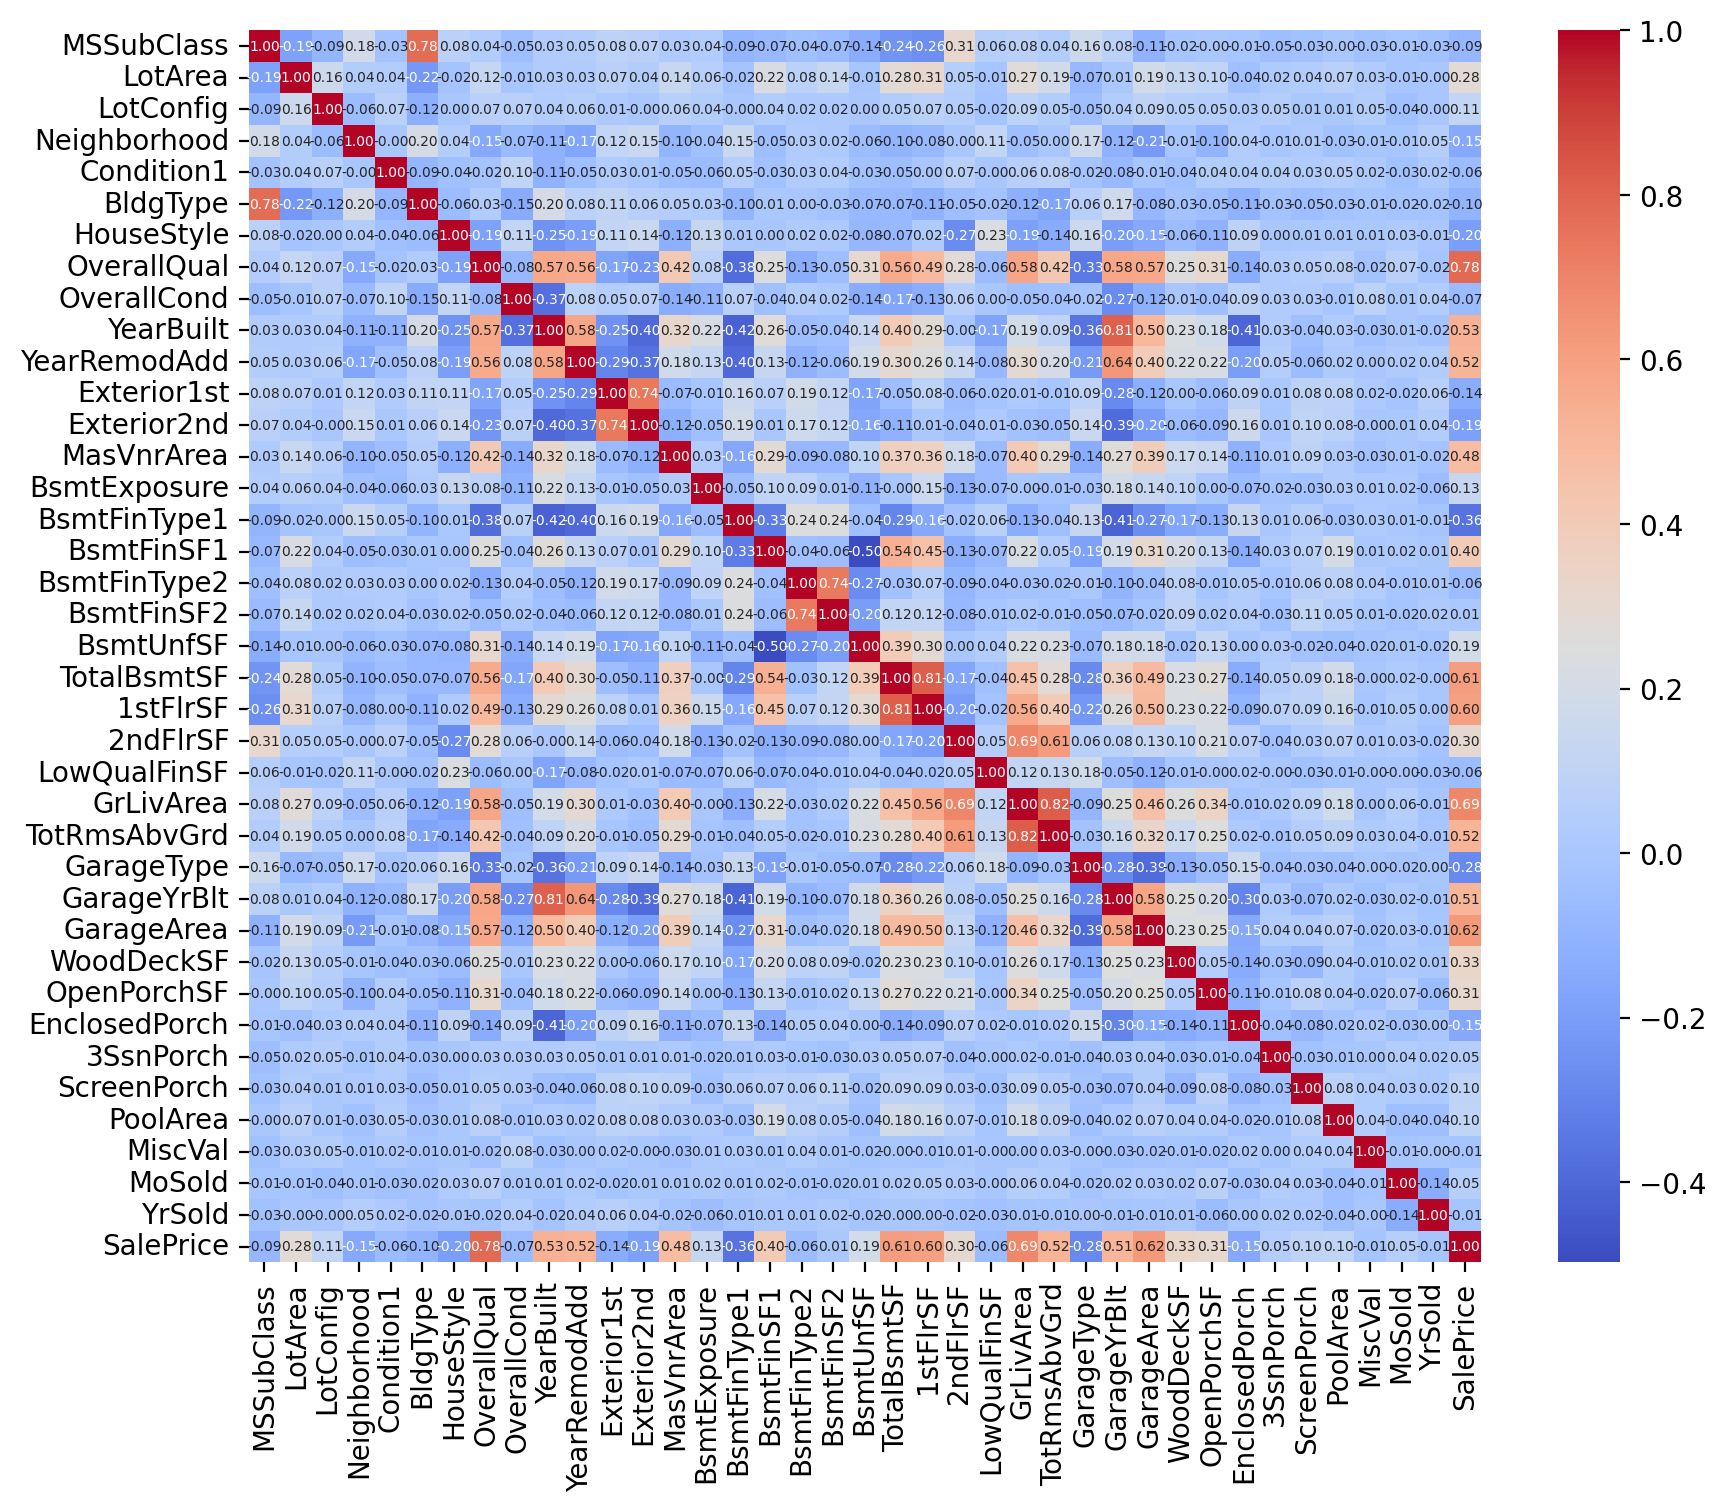

In [18]:
corr = train_dataset.corr(method = 'pearson')

plt.figure(figsize=(10, 8),dpi = 200)  # 그림 크기 설정
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True,annot_kws={"size": 5})
plt.show()  # 그림 출력

In [19]:
train_dataset_X = train_dataset.iloc[:,:-1]
train_dataset_y = train_dataset['SalePrice']
val_dataset_X = val_dataset.iloc[:,:-1]
val_dataset_y = val_dataset['SalePrice']

## standardization

In [20]:
scaler = StandardScaler()

scaler = scaler.fit(train_dataset_X)
train_x = scaler.transform(train_dataset_X)
val_x = scaler.transform(val_dataset_X)
train_x = pd.DataFrame(train_x)
val_x = pd.DataFrame(val_x)



In [21]:
print(train_x)

            0         1         2         3         4         5         6   \
0    -0.871869 -0.087855 -0.595825 -0.598314 -0.314693 -0.413088 -0.104147   
1    -0.871869 -0.256509 -0.595825  0.247933 -0.314693 -0.413088 -0.104147   
2     2.453720 -0.824718 -0.595825  1.771176 -0.314693  2.381235 -0.855036   
3    -0.871869  0.053010  1.384042  0.417182 -0.314693 -0.413088 -0.104147   
4    -0.159243 -0.451639 -0.595825 -0.259815 -0.314693 -0.413088  0.646742   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -0.871869  0.016025 -0.595825  0.247933 -0.314693 -0.413088 -0.104147   
1164 -0.871869  0.356769 -0.595825 -1.275311 -0.314693 -0.413088 -0.104147   
1165 -0.871869 -0.256509 -0.595825  0.247933 -0.314693 -0.413088 -0.104147   
1166  0.078299  0.452565 -0.595825  0.078684 -0.314693 -0.413088 -0.855036   
1167 -0.159243 -0.087855 -0.595825 -0.429064 -0.314693 -0.413088  0.646742   

            7         8         9   ...        28        29    

## 7. 선형회귀.

In [22]:
reg = LinearRegression()
reg.fit(train_x, train_dataset_y)
y_pred = reg.predict(train_x)

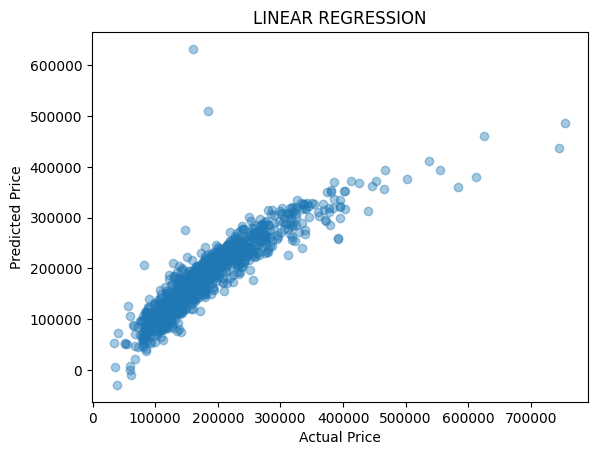

In [23]:
plt.scatter(train_dataset_y, y_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("LINEAR REGRESSION")
plt.show()

## 예측

In [24]:
reg.score(train_x, train_dataset_y) #train set R^2 점수


0.797329178381446

In [25]:
reg.score(val_x, val_dataset_y) #test set R^2 점수

0.8468991073558648